## Modeling for Instacart data

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import xgboost

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Import data from preprocessing.

In [ ]:
datapath = ('/content/drive/MyDrive/GITHUB/GitHub/00 Capstone 2 - Instacart Market Basket Analysis (Customer Segmentation)/data/processed_data.csv')

df = pd.read_csv(datapath)

In [ ]:
df.shape

(1384617, 39)

In [ ]:
df.head()

,order_id,product_id,reordered,aisle_id,department_id,user_id,order_hour_of_day,aisle,department_alcohol,department_babies,department_bakery,department_beverages,department_breakfast,department_bulk,department_canned goods,department_dairy eggs,department_deli,department_dry goods pasta,department_frozen,department_household,department_international,department_meat seafood,department_missing,department_other,department_pantry,department_personal care,department_pets,department_produce,department_snacks,order_dow_Friday,order_dow_Monday,order_dow_Saturday,order_dow_Sunday,order_dow_Thursday,order_dow_Tuesday,order_dow_Wednesday,add_to_cart_order,order_number,days_since_prior_order
0,1,49302,1,120,16,112108,10:00,yogurt,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,-1.045005,-0.787973,-0.773624
1,816049,49302,1,120,16,47901,06:00,yogurt,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,-0.236808,-0.186072,-0.102252
2,1242203,49302,1,120,16,2993,07:00,yogurt,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,-1.045005,-0.125882,-0.965445
3,1383349,49302,1,120,16,41425,08:00,yogurt,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.301990,-0.787973,-0.294073
4,1787378,49302,0,120,16,187205,14:00,yogurt,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,-0.102108,-0.727783,1.240491


In [ ]:
df = df.drop(['order_hour_of_day','aisle'], axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1384617 entries, 0 to 1384616
Data columns (total 37 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   order_id                    1384617 non-null  int64  
 1   product_id                  1384617 non-null  int64  
 2   reordered                   1384617 non-null  int64  
 3   aisle_id                    1384617 non-null  int64  
 4   department_id               1384617 non-null  int64  
 5   user_id                     1384617 non-null  int64  
 6   department_alcohol          1384617 non-null  int64  
 7   department_babies           1384617 non-null  int64  
 8   department_bakery           1384617 non-null  int64  
 9   department_beverages        1384617 non-null  int64  
 10  department_breakfast        1384617 non-null  int64  
 11  department_bulk             1384617 non-null  int64  
 12  department_canned goods     1384617 non-null  int64  
 1

In [ ]:
df.describe()

,order_id,product_id,reordered,aisle_id,department_id,user_id,department_alcohol,department_babies,department_bakery,department_beverages,department_breakfast,department_bulk,department_canned goods,department_dairy eggs,department_deli,department_dry goods pasta,department_frozen,department_household,department_international,department_meat seafood,department_missing,department_other,department_pantry,department_personal care,department_pets,department_produce,department_snacks,order_dow_Friday,order_dow_Monday,order_dow_Saturday,order_dow_Sunday,order_dow_Thursday,order_dow_Tuesday,order_dow_Wednesday,add_to_cart_order,order_number,days_since_prior_order
count,1.384617e+06,1.384617e+06,1.384617e+06,1.384617e+06,1.384617e+06,1.384617e+06,1.384617e+06,1.384617e+06,1.384617e+06,1.384617e+06,1.384617e+06,1.384617e+06,1.384617e+06,1.384617e+06,1.384617e+06,1.384617e+06,1.384617e+06,1.384617e+06,1.384617e+06,1.384617e+06,1.384617e+06,1.384617e+06,1.384617e+06,1.384617e+06,1.384617e+06,1.384617e+06,1.384617e+06,1.384617e+06,1.384617e+06,1.384617e+06,1.384617e+06,1.384617e+06,1.384617e+06,1.384617e+06,1.384617e+06,1.384617e+06,1.384617e+06
mean,1.706298e+06,2.555624e+04,5.985944e-01,7.130423e+01,9.839777e+00,1.031128e+05,4.042995e-03,1.079071e-02,3.495118e-02,8.236646e-02,2.130553e-02,9.814989e-04,3.379924e-02,1.567589e-01,3.198791e-02,2.795936e-02,7.252980e-02,2.598986e-02,8.595879e-03,2.188836e-02,5.959049e-03,1.296387e-03,5.867471e-02,1.557832e-02,3.247830e-03,2.954514e-01,8.584468e-02,1.277682e-01,1.487617e-01,1.497013e-01,2.340185e-01,1.122917e-01,1.159613e-01,1.114973e-01,-1.549931e-14,1.378045e-14,4.718488e-14
std,9.897326e+05,1.412127e+04,4.901829e-01,3.810409e+01,6.292830e+00,5.948715e+04,6.345591e-02,1.033164e-01,1.836563e-01,2.749223e-01,1.444009e-01,3.131352e-02,1.807121e-01,3.635734e-01,1.759679e-01,1.648565e-01,2.593632e-01,1.591050e-01,9.231466e-02,1.463191e-01,7.696455e-02,3.598205e-02,2.350150e-01,1.238372e-01,5.689713e-02,4.562456e-01,2.801347e-01,3.338316e-01,3.558536e-01,3.567785e-01,4.233840e-01,3.157251e-01,3.201786e-01,3.147470e-01,1.000000e+00,1.000000e+00,1.000000e+00
min,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.045005e+00,-7.879732e-01,-1.636816e+00
25%,8.433700e+05,1.338000e+04,0.000000e+00,3.100000e+01,4.000000e+00,5.173200e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-7.756056e-01,-6.675930e-01,-9.654447e-01
50%,1.701880e+06,2.529800e+04,1.000000e+00,8.300000e+01,8.000000e+00,1.029330e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.368076e-01,-3.666425e-01,-1.981627e-01
75%,2.568023e+06,3.794000e+04,1.000000e+00,1.070000e+02,1.600000e+01,1.549590e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000

## Split data into a training and test set.

In [ ]:
#the response variable is 'reordered'.
X = df.drop('reordered', axis=1)
y = df.reordered

In [ ]:
len(X), len(y)

(1384617, 1384617)

In [ ]:
X_train, y_train, X_test, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

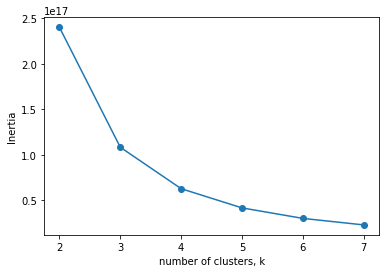

In [ ]:
#Import K-Mean models
from sklearn.cluster import KMeans

inertias = []

x_cols = X_train
for k in range(2,8):

  kmeans = KMeans(n_clusters=k)
  kmeans.fit(x_cols)
  inertias.append(kmeans.inertia_)

plt.plot(range(2,8), inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('Inertia')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(x_cols)
klabels = kmeans.labels_

In [ ]:
kmeans.cluster_centers_

array([[ 2.14012535e+06,  2.55551875e+04,  7.13027839e+01,
         9.85596616e+00,  1.03037706e+05,  4.09951521e-03,
         1.06419210e-02,  3.49699159e-02,  8.29153229e-02,
         2.19061274e-02,  1.03433922e-03,  3.37421636e-02,
         1.57076604e-01,  3.22411104e-02,  2.82803480e-02,
         7.13231553e-02,  2.53244924e-02,  8.30835082e-03,
         2.19481737e-02,  6.02944083e-03,  1.32025413e-03,
         5.89741541e-02,  1.56412272e-02,  3.24177049e-03,
         2.94984296e-01,  8.59973174e-02,  1.26618257e-01,
         1.48785072e-01,  1.54028247e-01,  2.31776078e-01,
         1.12600018e-01,  1.14862109e-01,  1.11330219e-01,
         2.44727916e-03, -2.62879859e-03,  1.69335397e-03],
       [ 4.32735866e+05,  2.55584987e+04,  7.13997905e+01,
         9.82437992e+00,  1.03154746e+05,  4.09824505e-03,
         1.13235679e-02,  3.45348673e-02,  8.20092281e-02,
         2.09022587e-02,  9.79226693e-04,  3.44784510e-02,
         1.57776390e-01,  3.16818118e-02,  2.82081763e-

In [ ]:
plt.scatter(X[ : , 0], X[ : , 1], s =50, c='b')
plt.scatter(-0.94665068, -0.97138368, s=200, c='g', marker='s')
plt.scatter(2.01559419, 2.02597093, s=200, c='r', marker='s')
plt.show()

TypeError: ignored